In [67]:
#Read txt files into lists for train and test data
import glob
import os
from bs4 import BeautifulSoup 

def cleanMe(html):
    
    soup = BeautifulSoup(html, "lxml") # create a new bs4 object from the html data loaded
    for script in soup(["script", "style"]): # remove all javascript and stylesheet code
        script.extract()
    # get text
    text = soup.get_text()
    # break into lines and remove leading and trailing space on each
    lines = (line.strip() for line in text.splitlines())
    # break multi-headlines into a line each
    chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
    # drop blank lines
    text = '\n'.join(chunk for chunk in chunks if chunk)
    return text

neg_list = sorted(glob.glob(os.path.join(os.getcwd(), "train_neg", "*.txt")))
pos_list = sorted(glob.glob(os.path.join(os.getcwd(), "train_pos", "*.txt")))
neg_testlist = sorted(glob.glob(os.path.join(os.getcwd(), "test_neg", "*.txt")))
pos_testlist = sorted(glob.glob(os.path.join(os.getcwd(), "test_pos", "*.txt")))

neg_train = []
pos_train = []
neg_test = []
pos_test = []

for file_path in neg_list:
    with open(file_path) as f_input:
        neg_train.append(cleanMe(f_input.read()))

for file_path in pos_list:
    with open(file_path) as f_input:
        pos_train.append(cleanMe(f_input.read()))
        
for file_path in neg_testlist:
    with open(file_path) as f_input:
        neg_test.append(cleanMe(f_input.read()))

for file_path in pos_testlist:
    with open(file_path) as f_input:
        pos_test.append(cleanMe(f_input.read()))

train_list = neg_train + pos_train
test_list = neg_test + pos_test

In [68]:
print(len(neg_train))
print(len(pos_train))
print(neg_list[0])
print(neg_train[0])

12500
12500
/Users/yuconghu/Downloads/1-gram/train_neg/0_3.txt
Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond. Future stars Sally Kirkland and Frederic Forrest can be seen briefly.


In [69]:
# Split train data into actual train and validation sets

train_split = 10000
train_data = neg_train[:train_split] + pos_train[:train_split]
train_targets = [0] * len(neg_train[:train_split]) + [1] * len(pos_train[:train_split])

val_data = neg_train[train_split:] + pos_train[train_split:]
val_targets = [0] * len(neg_train[train_split:]) + [1] * len(pos_train[train_split:])

test_data = test_list
test_targets = [0] * len(neg_test) + [1] * len(pos_test)


print ("Train dataset size is {}".format(len(train_data)))
print ("Val dataset size is {}".format(len(val_data)))
print ("Test dataset size is {}".format(len(test_data)))


Train dataset size is 20000
Val dataset size is 5000
Test dataset size is 25000


In [70]:
print(train_data[0])
print(train_targets[9999])

Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond. Future stars Sally Kirkland and Frederic Forrest can be seen briefly.
0


In [71]:
# Random sample from train dataset
import random
print (train_data[random.randint(0, len(train_data) - 1)])


I should preface this by stating that I am a Dolph Lundgren fan. The man turns out some of the funniest action clichés imaginable and Detention is probably my personal favorite. *Spoiler* even though there is no such thing as a Dolph spoiler since the scripts are so absurd to begin with: a chase scene with a handicapped kid carrying a pistol versus a guy on a Harley with a sub-machine gun, through a high school hallway and the kid wins? Good game, the Oscar goes to Detention. Dolph, if you're reading this, thanks for the laughs, old friend.In summary: Terrific movie that is a guaranteed laugh. I recommend inviting some friends over for this and forcing them to sit through it. Hilarious.


Before training the classifier, first we are going to tokenize the dataset using spacy.io

Run (shown in the cell below):

* ```pip install spacy```
* ```python -m spacy download en_core_web_sm```

In [9]:
!pip install spacy
!python -m spacy download en_core_web_sm


    Linking successful
    /anaconda3/lib/python3.6/site-packages/en_core_web_sm -->
    /anaconda3/lib/python3.6/site-packages/spacy/data/en_core_web_sm

    You can now load the model via spacy.load('en_core_web_sm')



In [233]:
# Let's write the tokenization function 
import spacy
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

print(stop_words)
# Load English tokenizer, tagger, parser, NER and word vectors
tokenizer = spacy.load('en_core_web_sm')
punctuations = string.punctuation

# lowercase and remove punctuation
def tokenize(sent):
  tokens = tokenizer(sent)
  return [token.text.lower() for token in tokens if ((token.text not in punctuations) and (token.text not in stop_words))]

# Example
tokens = tokenize(u"Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond. Future stars Sally Kirkland and Frederic Forrest can be seen briefly.")
print (tokens)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yuconghu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
{'then', 'couldn', 'very', 'she', 'hers', 'more', 'does', "weren't", 'now', 'on', 'yourselves', "you're", 'between', 'just', 'had', 'haven', 'wasn', "she's", 'shan', "wouldn't", 're', 'have', 've', "aren't", "haven't", 't', 'against', 'with', "isn't", 'he', 'this', 'an', 'other', 'over', "you'll", 'ain', 'they', 'herself', 'doesn', "you'd", 'their', 'our', 'isn', 'didn', 'himself', 'each', "won't", 'what', 'but', "you've", "should've", 'most', 'weren', 'down', 'after', 'hasn', 'there', 'mustn', 'only', 'both', 'and', "wasn't", 'were', 'ours', 'its', 'theirs', 'needn', 'a', 'm', 'who', 'before', 'why', 'my', 'don', 'while', 'through', 'again', 'from', 'your', 'to', "hadn't", 'shouldn', 'no', 'yours', "shouldn't", "didn't", 'about', 'which', 'being', "doesn't", 'itself', 'y', 'as', 'them', 'themselves', 'll', 'will', 'same', "that'll", 'has', 'w

In [234]:
# This is the code cell that tokenizes train/val/test datasets
# However it takes about 15-20 minutes to run it
# For convinience we have provided the preprocessed datasets
# Please see the next code cell
import pickle as pkl

def tokenize_dataset(dataset):
    token_dataset = []
    # we are keeping track of all tokens in dataset 
    # in order to create vocabulary later
    all_tokens = []
    
    for sample in dataset:
        tokens = tokenize(sample)
        token_dataset.append(tokens)
        all_tokens += tokens

    return token_dataset, all_tokens

# val set tokens
print ("Tokenizing val data")
val_data_tokens, _ = tokenize_dataset(val_data)
pkl.dump(val_data_tokens, open("val_data_tokens.p", "wb"))

# test set tokens
print ("Tokenizing test data")
test_data_tokens, _ = tokenize_dataset(test_data)
pkl.dump(test_data_tokens, open("test_data_tokens.p", "wb"))

# train set tokens
print ("Tokenizing train data")
train_data_tokens, all_train_tokens = tokenize_dataset(train_data)
pkl.dump(train_data_tokens, open("train_data_tokens.p", "wb"))
pkl.dump(all_train_tokens, open("all_train_tokens.p", "wb"))

Tokenizing val data
Tokenizing test data
Tokenizing train data


In [235]:
# First, download datasets from here
# Use your NYU account
#https://drive.google.com/open?id=1eR2LFI5MGliHlaL1S2nsX4ouIO1k_ip2
#https://drive.google.com/open?id=133QCWbiz_Xc7Qm4r6t-fJP1K669xjNlM
#https://drive.google.com/open?id=1SuUIUpJ1iznU707ktkpnEGSwt_XIqOYp
#https://drive.google.com/open?id=1UQsrZ2LVfcxdxxa47344fMs_qvya72KR

# Then, load preprocessed train, val and test datasets
pre_train_data_tokens = pkl.load(open("train_data_tokens.p", "rb"))
pre_all_train_tokens = pkl.load(open("all_train_tokens.p", "rb"))

pre_val_data_tokens = pkl.load(open("val_data_tokens.p", "rb"))
pre_test_data_tokens = pkl.load(open("test_data_tokens.p", "rb"))

# double checking
print ("Train dataset size is {}".format(len(pre_train_data_tokens)))
print ("Val dataset size is {}".format(len(pre_val_data_tokens)))
print ("Test dataset size is {}".format(len(pre_test_data_tokens)))

print ("Total number of tokens in train dataset is {}".format(len(all_train_tokens)))

Train dataset size is 20000
Val dataset size is 5000
Test dataset size is 25000
Total number of tokens in train dataset is 2745964


In [257]:
def bigram(ls):
    gramLs = []
    for i in range(0, len(ls)-1):
        gramLs.append(ls[i]+' '+ls[i+1])
    return gramLs

def trigram(ls):
    gramLs = []  
    for i in range(0, len(ls)-2):
        gramLs.append(ls[i]+' '+ls[i+1]+' '+ls[i+2])
    return gramLs

def four_gram(ls):
    gramLs = []  
    for i in range(0, len(ls)-3):
        gramLs.append(ls[i]+' '+ls[i+1]+' '+ls[i+2]+' '+ls[i+3])
    return gramLs

def bigramls(ls):
    total = []
    
    for row in range(0, len(ls)):
        gramLs = []
        for index in range(0, len(ls[row])-1):
            gramLs.append(ls[row][index]+' '+ls[row][index+1])
        total.append(gramLs)
    return total

def trigramls(ls):
    total = []
    
    for row in range(0, len(ls)):
        gramLs = []
        for index in range(0, len(ls[row])-2):
            gramLs.append(ls[row][index]+' '+ls[row][index+1]+' '+ls[row][index+2])
        total.append(gramLs)
    return total

def four_gramls(ls):
    total = []
    
    for row in range(0, len(ls)):
        gramLs = []
        for index in range(0, len(ls[row])-3):
            gramLs.append(ls[row][index]+' '+ls[row][index+1]+' '+ls[row][index+2]+' '+ls[row][index+3])
        total.append(gramLs)
    return total

#print(pre_train_data_tokens[1])
#print(pre_all_train_tokens[0:200])


train_data_tokens = trigramls(pre_train_data_tokens)
all_train_tokens = trigram(pre_all_train_tokens)
val_data_tokens = trigramls(pre_val_data_tokens)
test_data_tokens = trigramls(pre_test_data_tokens)
print(len(pre_all_train_tokens))
print(len(all_train_tokens))


2745964
2745962


Now, we are going to create the vocabulary of most common 10,000 tokens in the training set.

In [258]:
from collections import Counter

max_vocab_size = 15000
# save index 0 for unk and 1 for pad
PAD_IDX = 0
UNK_IDX = 1

def build_vocab(all_tokens):
    # Returns:
    # id2token: list of tokens, where id2token[i] returns token that corresponds to token i
    # token2id: dictionary where keys represent tokens and corresponding values represent indices
    token_counter = Counter(all_tokens)
    vocab, count = zip(*token_counter.most_common(max_vocab_size))
    id2token = list(vocab)
    token2id = dict(zip(vocab, range(2,2+len(vocab)))) 
    id2token = ['<pad>', '<unk>'] + id2token
    token2id['<pad>'] = PAD_IDX 
    token2id['<unk>'] = UNK_IDX
    return token2id, id2token

token2id, id2token = build_vocab(all_train_tokens)
token2id

{"i ca n't": 2,
 "i 've seen": 3,
 "i n't know": 4,
 "i 'm sure": 5,
 "i 've ever": 6,
 "i n't think": 7,
 "i could n't": 8,
 'i ever seen': 9,
 "'ve ever seen": 10,
 "i wo n't": 11,
 "i would n't": 12,
 'i saw movie': 13,
 'i think i': 14,
 "ca n't believe": 15,
 "i n't like": 16,
 'i first saw': 17,
 "ca n't help": 18,
 "movie i 've": 19,
 "movie it 's": 20,
 "i think 's": 21,
 "it 's like": 22,
 'i would recommend': 23,
 'i must say': 24,
 'i highly recommend': 25,
 "n't waste time": 26,
 'first time i': 27,
 "i n't seen": 28,
 'i saw film': 29,
 "i n't want": 30,
 'i would like': 31,
 "i 'm going": 32,
 'ever seen i': 33,
 "i 've never": 34,
 'new york city': 35,
 'one worst movies': 36,
 'worst movie i': 37,
 "i 'm glad": 38,
 'i thought i': 39,
 'i watched movie': 40,
 'i know i': 41,
 'the special effects': 42,
 'movie i ever': 43,
 "i n't care": 44,
 'i wish i': 45,
 "i n't even": 46,
 'i say i': 47,
 "film it 's": 48,
 "i 'd like": 49,
 "ca n't say": 50,
 'i would say': 51,
 "

In [259]:
# Lets check the dictionary by loading random token from it
import random

random_token_id = random.randint(0, len(id2token)-1)
random_token = id2token[random_token_id]

print ("Token id '{}' ; token '{}'".format(random_token_id, id2token[random_token_id]))
print ("Token '{}'; token id '{}'".format(random_token, token2id[random_token]))

Token id '3251' ; token 'movie there many'
Token 'movie there many'; token id '3251'


In [260]:
# convert token to id in the dataset
def token2index_dataset(tokens_data):
    indices_data = []
    for tokens in tokens_data:
        index_list = [token2id[token] if token in token2id else UNK_IDX for token in tokens]
        indices_data.append(index_list)
    return indices_data

train_data_indices = token2index_dataset(train_data_tokens)
val_data_indices = token2index_dataset(val_data_tokens)
test_data_indices = token2index_dataset(test_data_tokens)

# double checking
print ("Train dataset size is {}".format(len(train_data_indices)))
print ("Val dataset size is {}".format(len(val_data_indices)))
print ("Test dataset size is {}".format(len(test_data_indices)))

Train dataset size is 20000
Val dataset size is 5000
Test dataset size is 25000


Now we are going to create PyTorch DataLoader 

In [261]:
MAX_SENTENCE_LENGTH = 200

import numpy as np
import torch
from torch.utils.data import Dataset

class NewsGroupDataset(Dataset):
    """
    Class that represents a train/validation/test dataset that's readable for PyTorch
    Note that this class inherits torch.utils.data.Dataset
    """
    
    def __init__(self, data_list, target_list):
        """
        @param data_list: list of newsgroup tokens 
        @param target_list: list of newsgroup targets 

        """
        self.data_list = data_list
        self.target_list = target_list
        assert (len(self.data_list) == len(self.target_list))

    def __len__(self):
        return len(self.data_list)
        
    def __getitem__(self, key):
        """
        Triggered when you call dataset[i]
        """
        
        token_idx = self.data_list[key][:MAX_SENTENCE_LENGTH]
        label = self.target_list[key]
        return [token_idx, len(token_idx), label]

def newsgroup_collate_func(batch):
    """
    Customized function for DataLoader that dynamically pads the batch so that all 
    data have the same length
    """
    data_list = []
    label_list = []
    length_list = []
    #print("collate batch: ", batch[0][0])
    #batch[0][0] = batch[0][0][:MAX_SENTENCE_LENGTH]
    for datum in batch:
        label_list.append(datum[2])
        length_list.append(datum[1])
    # padding
    for datum in batch:
        padded_vec = np.pad(np.array(datum[0]), 
                                pad_width=((0,MAX_SENTENCE_LENGTH-datum[1])), 
                                mode="constant", constant_values=0)
        data_list.append(padded_vec)
    return [torch.from_numpy(np.array(data_list)), torch.LongTensor(length_list), torch.LongTensor(label_list)]

# create pytorch dataloader
#train_loader = NewsGroupDataset(train_data_indices, train_targets)
#val_loader = NewsGroupDataset(val_data_indices, val_targets)
#test_loader = NewsGroupDataset(test_data_indices, test_targets)

BATCH_SIZE = 32
train_dataset = NewsGroupDataset(train_data_indices, train_targets)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=True)

val_dataset = NewsGroupDataset(val_data_indices, val_targets)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=True)

test_dataset = NewsGroupDataset(test_data_indices, test_targets)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=False)

for i, (data, lengths, labels) in enumerate(train_loader):
    print (data)
    print (labels)
    break

tensor([[    1,     1,     1,  ...,     0,     0,     0],
        [    1,     1,     1,  ...,     0,     0,     0],
        [    1,   883,     1,  ...,     0,     0,     0],
        ...,
        [10376,  4636,  6063,  ...,     1,     1,     1],
        [  295,     1,     1,  ...,     0,     0,     0],
        [    1,     1,     1,  ...,     0,     0,     0]])
tensor([1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 0, 1])


Here we will define Bag-of-Words model in PyTorch

In [262]:
# First import torch related libraries
import torch
import torch.nn as nn
import torch.nn.functional as F

class BagOfWords(nn.Module):
    """
    BagOfWords classification model
    """
    def __init__(self, vocab_size, emb_dim):
        """
        @param vocab_size: size of the vocabulary. 
        @param emb_dim: size of the word embedding
        """
        super(BagOfWords, self).__init__()
        # pay attention to padding_idx 
        self.embed = nn.Embedding(vocab_size, emb_dim, padding_idx=0)
        self.linear = nn.Linear(emb_dim,20)
    
    def forward(self, data, length):
        """
        
        @param data: matrix of size (batch_size, max_sentence_length). Each row in data represents a 
            review that is represented using n-gram index. Note that they are padded to have same length.
        @param length: an int tensor of size (batch_size), which represents the non-trivial (excludes padding)
            length of each sentences in the data.
        """
        out = self.embed(data)
        out = torch.sum(out, dim=1)
        out /= length.view(length.size()[0],1).expand_as(out).float()
     
        # return logits
        out = self.linear(out.float())
        return out

emb_dim = 100
model = BagOfWords(len(id2token), emb_dim)

In [274]:
learning_rate = 0.015
num_epochs = 10 # number epoch to train
#val_vocab10k_plot = []
#val_vocab20k_plot = []
#val_vocab30k_plot = []
#val_vocab40k_plot = []
#val_vocab50k_plot = []
#val_anneal_plot = []
#val_ntlk_plot = []
#val_plot = []
#val_opti_plot = []
val_lr_plot = []
#val_lr_total = []

# Criterion and Optimizer
criterion = torch.nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Linearly annealing learning rate to reduce overshooting minima
scheduler = torch.optim.lr_scheduler.StepLR(optimizer = optimizer,step_size = 1)

# Function for testing the model
def test_model(loader, model):
    """
    Help function that tests the model's performance on a dataset
    @param: loader - data loader for the dataset to test against
    """
    correct = 0
    total = 0
    model.eval()
    for data, lengths, labels in loader:
        data_batch, length_batch, label_batch = data, lengths, labels
        outputs = F.softmax(model(data_batch, length_batch), dim=1)
        predicted = outputs.max(1, keepdim=True)[1]
        
        total += labels.size(0)
        correct += predicted.eq(labels.view_as(predicted)).sum().item()
    return (100 * correct / total)

for epoch in range(num_epochs):
    for i, (data, lengths, labels) in enumerate(train_loader):
        model.train()
        data_batch, length_batch, label_batch = data, lengths, labels
        optimizer.zero_grad()
        outputs = model(data_batch, length_batch)
        loss = criterion(outputs, label_batch)
        loss.backward()
        optimizer.step()
        
        # validate every 100 iterations
        if i > 0 and i % 100 == 0:
            # validate
            val_acc = test_model(val_loader, model)
            val_lr_plot.append(val_acc)
            print('Epoch: [{}/{}], Step: [{}/{}], Validation Acc: {}'.format( 
                       epoch+1, num_epochs, i+1, len(train_loader), val_acc))
    # implement linear annealing
    #scheduler.step()
    
val_lr_total.append(val_lr_plot)

Epoch: [1/10], Step: [101/625], Validation Acc: 66.08
Epoch: [1/10], Step: [201/625], Validation Acc: 65.94
Epoch: [1/10], Step: [301/625], Validation Acc: 66.58
Epoch: [1/10], Step: [401/625], Validation Acc: 66.16
Epoch: [1/10], Step: [501/625], Validation Acc: 63.94
Epoch: [1/10], Step: [601/625], Validation Acc: 64.06
Epoch: [2/10], Step: [101/625], Validation Acc: 64.48
Epoch: [2/10], Step: [201/625], Validation Acc: 64.68
Epoch: [2/10], Step: [301/625], Validation Acc: 64.02
Epoch: [2/10], Step: [401/625], Validation Acc: 66.5
Epoch: [2/10], Step: [501/625], Validation Acc: 66.26
Epoch: [2/10], Step: [601/625], Validation Acc: 66.18
Epoch: [3/10], Step: [101/625], Validation Acc: 66.32
Epoch: [3/10], Step: [201/625], Validation Acc: 66.1
Epoch: [3/10], Step: [301/625], Validation Acc: 66.4
Epoch: [3/10], Step: [401/625], Validation Acc: 66.02
Epoch: [3/10], Step: [501/625], Validation Acc: 64.14
Epoch: [3/10], Step: [601/625], Validation Acc: 66.52
Epoch: [4/10], Step: [101/625],

In [264]:
print ("After training for {} epochs".format(num_epochs))
print ("Val Acc {}".format(test_model(val_loader, model)))
print ("Test Acc {}".format(test_model(test_loader, model)))

After training for 10 epochs
Val Acc 67.16
Test Acc 69.0


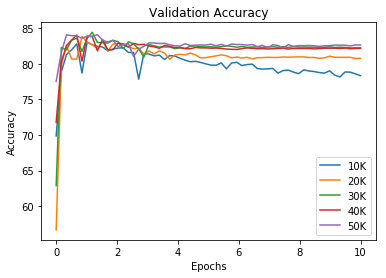

In [215]:
import matplotlib.pyplot as plt
%matplotlib inline

mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)

ax.set_title("Validation Accuracy")
ax.set_xlabel("Epochs")
ax.set_ylabel("Accuracy")

#Validation curve
xs = np.linspace(0,10,60)
ys1 = val_plot[0]
ys2 = val_plot[1]
ys3 = val_plot[2]
ys4 = val_plot[3][:60]
ys5 = val_plot[4]

#axes = plt.gca()
#axes.set_ylim([77,82])

plt.plot(xs, ys1, label = "10K")
plt.plot(xs, ys2, label = "20K")
plt.plot(xs, ys3, label = "30K")
plt.plot(xs, ys4, label = "40K")
plt.plot(xs, ys5, label = "50K")


plt.legend()



In [ ]:

mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)

ax.set_title("Validation Accuracy")
ax.set_xlabel("Epochs")
ax.set_ylabel("Accuracy")

#Validation curve
xs = np.linspace(0,10,60)
ys1 = val_plot[0]
ys2 = val_plot[1]
ys3 = val_plot[2]
ys4 = val_plot[3][:60]
ys5 = val_plot[4]

#axes = plt.gca()
#axes.set_ylim([77,82])

plt.plot(xs, ys1, label = "10K")
plt.plot(xs, ys2, label = "20K")
plt.plot(xs, ys3, label = "30K")
plt.plot(xs, ys4, label = "40K")
plt.plot(xs, ys5, label = "50K")


plt.legend()




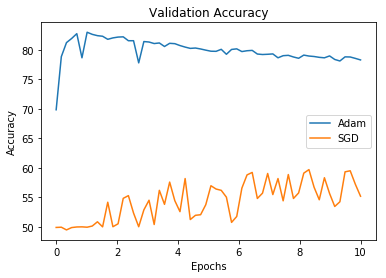

In [199]:
plt.show()
mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)

ax.set_title("Validation Accuracy")
ax.set_xlabel("Epochs")
ax.set_ylabel("Accuracy")

#Validation curve
xs = np.linspace(0,10,60)
ys1 = val_plot[0]
ys2 = val_opti_plot[0][120:180]


#axes = plt.gca()
#axes.set_ylim([77,82])

plt.plot(xs, ys1, label = "Adam")
plt.plot(xs, ys2, label = "SGD")

plt.legend()

plt.show()
#2-gram, vocab = 10,000

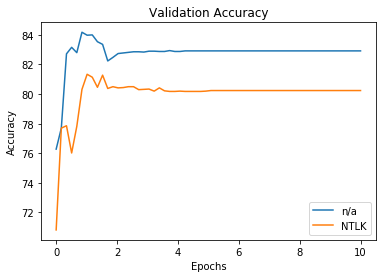

In [266]:


plt.show()
mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)

ax.set_title("Validation Accuracy")
ax.set_xlabel("Epochs")
ax.set_ylabel("Accuracy")

#Validation curve
xs = np.linspace(0,10,60)
ys1 = val_anneal_plot
ys2 = val_ntlk_plot


#axes = plt.gca()
#axes.set_ylim([77,82])

plt.plot(xs, ys1, label = "n/a")
plt.plot(xs, ys2, label = "NTLK")

plt.legend()

plt.show()
#2-gram, vocab = 50,000

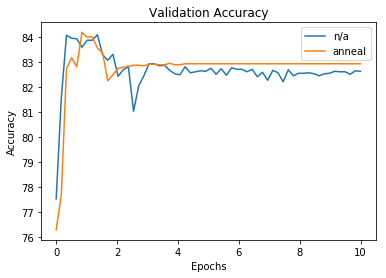

In [267]:


plt.show()
mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)

ax.set_title("Validation Accuracy")
ax.set_xlabel("Epochs")
ax.set_ylabel("Accuracy")

#Validation curve
xs = np.linspace(0,10,60)
ys1 = val_plot[4]
ys2 = val_anneal_plot


#axes = plt.gca()
#axes.set_ylim([77,82])

plt.plot(xs, ys1, label = "n/a")
plt.plot(xs, ys2, label = "anneal")

plt.legend()

plt.show()
#2-gram, vocab = 50,000

<function matplotlib.pyplot.show(*args, **kw)>

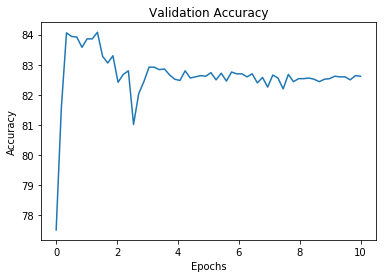

In [268]:
plt.show()
mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)

ax.set_title("Validation Accuracy")
ax.set_xlabel("Epochs")
ax.set_ylabel("Accuracy")

#Validation curve
xs = np.linspace(0,10,60)
ys5 = val_plot[4]
plt.plot(xs, ys5)
plt.show

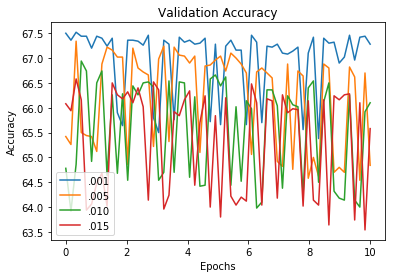

In [275]:

mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)

ax.set_title("Validation Accuracy")
ax.set_xlabel("Epochs")
ax.set_ylabel("Accuracy")

#Validation curve
xs = np.linspace(0,10,60)
ys1 = val_lr_total[0]
ys2 = val_lr_total[1]
ys3 = val_lr_total[2]
ys4 = val_lr_total[3]

#axes = plt.gca()
#axes.set_ylim([77,82])

plt.plot(xs, ys1, label = ".001")
plt.plot(xs, ys2, label = ".005")
plt.plot(xs, ys3, label = ".010")
plt.plot(xs, ys4, label = ".015")


plt.legend()




## Exercise 1
### Try training the model with larger embedding size and for larger number of epochs
### Also plot the training curves of the model

## Exercise 2:
### Try downloading IMDB Large Movie Review Dataset that is used for Assignment 1 http://ai.stanford.edu/~amaas/data/sentiment/
### and tokenize it

## Exercise 3:
### If you have time, after tokenizing the dataset try training Bag-of-Words model on it and report your initial results
### on validation set.